In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

### 타겟기간 동안(20200120 ~ 20210120)한국거래소 KRX에서 KOSPI 시장 거래 상위 50개 기업 자료 다운로드

In [3]:
df= pd.read_csv('krx_kospi_2020.csv', encoding='cp949')
df.head()

,순위,종목코드,종목명,시장구분,시작일기준가,종료일종가,대비,등락률,거래량_합계,거래량_일평균,거래대금_합계,거래대금_일평균
0,1,4410,서울식품,KOSPI,169,207,38,22.49,9271027397,37233042,2001376502462,8037656636
1,2,5930,삼성전자,KOSPI,61300,87200,25900,42.25,5837422519,23443464,348486212871774,1399543023581
2,3,93230,이아이디,KOSPI,223,279,56,25.11,5138940479,20638315,1597719777730,6416545292
3,4,1510,SK증권,KOSPI,622,903,281,45.18,4635662351,18617118,4191292444870,16832499779
4,5,25560,미래산업,KOSPI,6456,3255,-3201,-49.58,4349171197,17466551,512573648767,2058528710


#### KOSPI 종목만 추출

KOSPI: 우리나라 대표 증권시장이라고 할 수 있는 코스피는 한국증권거래소에 상장되어 거래되는 모든 주식(코스닥 제외)을 대상으로 전체 종목의 흐름을 나타내는 지수이며 <br>코스피에 상장하기 위해서는 자기자본 100억원 이상, 기준 시가 총액 200억 이상, 코스닥에서 코스피 이전시 300억 이상 등의 엄격한 요건이 있다. <br> 코스피는 주요 선진국 시장으로부터 투자적격 증권시장으로 인정받았기 때문에 코스피 시장에 상장된 기업은 상장기업으로서의 지명도를 활용할 수 있다

In [4]:
df_kospi_after= df[df['시장구분'] == 'KOSPI']
df_kospi_after

,순위,종목코드,종목명,시장구분,시작일기준가,종료일종가,대비,등락률,거래량_합계,거래량_일평균,거래대금_합계,거래대금_일평균
0,1,4410,서울식품,KOSPI,169,207,38,22.49,9271027397,37233042,2001376502462,8037656636
1,2,5930,삼성전자,KOSPI,61300,87200,25900,42.25,5837422519,23443464,348486212871774,1399543023581
2,3,93230,이아이디,KOSPI,223,279,56,25.11,5138940479,20638315,1597719777730,6416545292
3,4,1510,SK증권,KOSPI,622,903,281,45.18,4635662351,18617118,4191292444870,16832499779
4,5,25560,미래산업,KOSPI,6456,3255,-3201,-49.58,4349171197,17466551,512573648767,2058528710
5,6,11930,신성이엔지,KOSPI,996,3520,2524,253.41,4327557120,17379747,11382482142980,45712779691
6,7,3060,에이프로젠제약,KOSPI,1287,1235,-52,-4.04,3315373700,13314754,5729408158335,23009671319
7,8,92220,KEC,KOSPI,1070,3010,1940,181.31,3308255979,13286169,7494661378960,30099041683
8,9,8350,남선알미늄,KOSPI,4265,4335,70,1.64,3154527742,12668786,16902001727295,67879525009
9,10,14160,대영포장,KOSPI,1130,1730,600,53.10,2642307865,10611678,4048221212154,16257916515


In [33]:
df_kospi_after.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   순위        50 non-null     int64  
 1   종목코드      50 non-null     int64  
 2   종목명       50 non-null     object 
 3   시장구분      50 non-null     object 
 4   시작일기준가    50 non-null     int64  
 5   종료일종가     50 non-null     int64  
 6   대비        50 non-null     int64  
 7   등락률       50 non-null     float64
 8   거래량_합계    50 non-null     int64  
 9   거래량_일평균   50 non-null     int64  
 10  거래대금_합계   50 non-null     int64  
 11  거래대금_일평균  50 non-null     int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 5.1+ KB


In [34]:
df_kospi_after.describe()

,순위,종목코드,시작일기준가,종료일종가,대비,등락률,거래량_합계,거래량_일평균,거래대금_합계,거래대금_일평균
count,50.00000,50.00000,50.000000,50.000000,50.000000,50.000000,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,25.50000,22453.80000,4763.940000,8734.920000,3970.980000,101.058400,2.218773e+09,8.910735e+06,1.629147e+13,6.542761e+10
std,14.57738,37336.86458,8994.155813,18056.575555,13527.820386,218.216921,1.512461e+09,6.074141e+06,4.982603e+13,2.001046e+11
min,1.00000,890.00000,169.000000,207.000000,-6362.000000,-49.580000,1.087606e+09,4.367895e+06,5.125736e+11,2.058529e+09
25%,13.25000,3675.00000,1156.250000,2058.750000,59.500000,3.600000,1.320485e+09,5.303153e+06,3.043363e+12,1.222234e+10
50%,25.50000,9800.00000,2327.500000,3612.500000,1035.000000,48.960000,1.714345e+09,6.884920e+06,5.051170e+12,2.028582e+10
75%,37.75000,24310.00000,5244.750000,7132.500000,2614.750000,86.692500,2.467604e+09,9.910054e+06,1.103548e+13,4.431918e+10
max,50.00000,214330.00000,61300.000000,98000.000000,91010.000000,1302.000000,9.271027e+09,3.723304e+07,3.484862e+14,1.399543e+12


In [5]:
# 매일매일의 거래량은 누적합계에서 가감된다. 종가가 그날 고가에 가까울수록 더 많은 거래량이 누적되며, 종가가 그날 저가에 가까울수록 그날의 거래량은 누적된 거래량에서 차감된다. 만약 종가가 그날 고가와 저가의 정중앙에 있을 경우 그날의 거래량은 무시한다.


df_kospi_after.sort_values('거래량_합계', ascending=False)

,순위,종목코드,종목명,시장구분,시작일기준가,종료일종가,대비,등락률,거래량_합계,거래량_일평균,거래대금_합계,거래대금_일평균
0,1,4410,서울식품,KOSPI,169,207,38,22.49,9271027397,37233042,2001376502462,8037656636
1,2,5930,삼성전자,KOSPI,61300,87200,25900,42.25,5837422519,23443464,348486212871774,1399543023581
2,3,93230,이아이디,KOSPI,223,279,56,25.11,5138940479,20638315,1597719777730,6416545292
3,4,1510,SK증권,KOSPI,622,903,281,45.18,4635662351,18617118,4191292444870,16832499779
4,5,25560,미래산업,KOSPI,6456,3255,-3201,-49.58,4349171197,17466551,512573648767,2058528710
5,6,11930,신성이엔지,KOSPI,996,3520,2524,253.41,4327557120,17379747,11382482142980,45712779691
6,7,3060,에이프로젠제약,KOSPI,1287,1235,-52,-4.04,3315373700,13314754,5729408158335,23009671319
7,8,92220,KEC,KOSPI,1070,3010,1940,181.31,3308255979,13286169,7494661378960,30099041683
8,9,8350,남선알미늄,KOSPI,4265,4335,70,1.64,3154527742,12668786,16902001727295,67879525009
9,10,14160,대영포장,KOSPI,1130,1730,600,53.10,2642307865,10611678,4048221212154,16257916515


In [6]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = 'C:/Windows/Fonts/malgun.ttf'

fontname = fm.FontProperties(fname=font_path, size=18).get_name()
plt.rcParams["font.family"] = fontname
plt.rcParams["font.size"] = 12


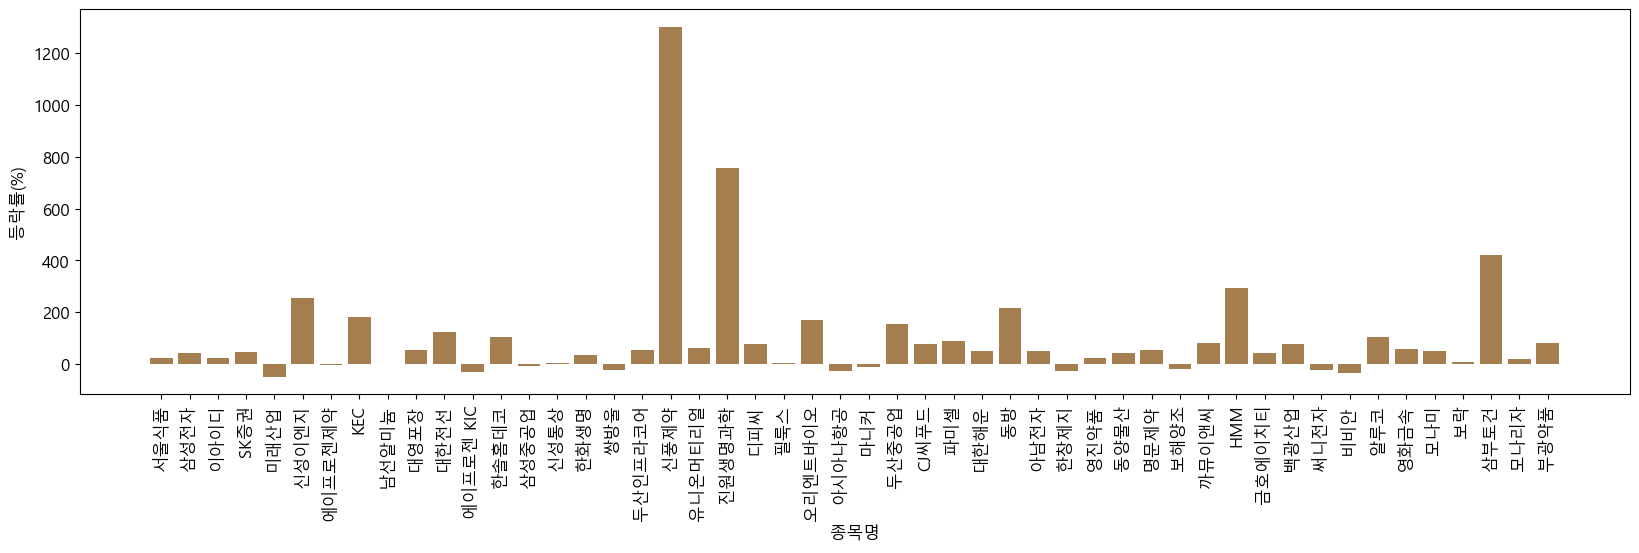

In [12]:
fig, ax = plt.subplots(figsize=(20, 5))

ax.bar(df_kospi_after['종목명'], df_kospi_after['등락률'], color='#A57E4F')
ax.set_xlabel("종목명")
ax.set_ylabel("등락률(%)")
plt.xticks(rotation=90)

plt.show()

In [ ]:
df_kospi_after.sort_values('등락률', ascending=False).head(10)

In [ ]:
df_kospi_after.sort_values('등락률', ascending=False).head(10).to_csv('krx_kospi_after')